In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('D:\\PythonProject1\\data\\house_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print("数据形状（房子数，特征数",df.shape)
missing_data = df.isnull().sum() #统计缺失值
missing_data = missing_data[missing_data > 0]
print("有缺失值的列：",missing_data)

数据形状（房子数，特征数 (1460, 81)
有缺失值的列： LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [4]:
#处理缺失值分数值与非数值
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns
print("数值列：",num_cols)
print("非数值列：",cat_cols)

数值列： Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
非数值列： Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       '

In [5]:
#填充缺失值
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0]) #iloc[0]是遇到多个众数取第一个
total_missing = df.isnull().sum().sum()   #第一个sum求每列个数，第二个求总个数
print("填充缺失值后，剩余缺失值个数：",total_missing)

填充缺失值后，剩余缺失值个数： 0


In [6]:
#把非数字列转换为数字
df_encoded = pd.get_dummies(df,drop_first= True) #drop_first=True 会删除第一个虚拟变量，避免完全多重共线性
print(f"转数字前有{df.shape[1]}列")   #shape[1]列数 ,[0]行数
print(f"转数字后有{df_encoded.shape[1]}列")

转数字前有81列
转数字后有246列


In [7]:
#分离特征与标签,划分训练集与测试集
X = df_encoded.drop('SalePrice',axis=1)
y = df_encoded['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from xgboost import XGBRegressor   #预测用Regressor，分类用Classifier
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

In [9]:
#训练模型
model.fit(X_train,y_train)
#fit() 方法是scikit-learn中训练模型的标准方法

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [10]:
y_pred = model.predict(X_test)#perdict用于生成预测结果
from sklearn.metrics import mean_squared_error
#计算rmse平均误差
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"RMSE:{rmse:.2f}")

RMSE:26352.76


In [11]:
#拿到所有特征名字
feature_names = X_train.columns
#拿到特征重要性
feature_importance = model.feature_importances_
#特证名与特征重要性对应
importance_df = pd.DataFrame({'特证名':feature_names,'重要性分数':feature_importance}).sort_values('重要性分数',ascending=False)
print(importance_df.head(10))


                   特证名     重要性分数
4          OverallQual  0.346281
26          GarageCars  0.081281
213   GarageFinish_Unf  0.055644
16           GrLivArea  0.039026
189       CentralAir_Y  0.034430
40         MSZoning_RM  0.022632
22        KitchenAbvGr  0.021195
211  GarageType_Detchd  0.020313
19            FullBath  0.019553
237       SaleType_New  0.019324


In [12]:
#优化模型
from sklearn.model_selection import GridSearchCV
#GridSearchCV 用于自动寻找最优的模型参数组合

In [13]:
#参数网络，尝试新的参数组合3*3*2=18种
param_grid = {
    'max_depth': [3,5,7], #决策树的最大深度
    'learning_rate': [0.01,0.05,0.1],
    'n_estimators': [100,500,1000]  #树的数量
}

In [14]:
base_model = XGBRegressor(random_state=42)
grid_search  = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  #使用负均方误差
    cv=5, #分成5份，四分训练，一份验证，循环5次
    n_jobs=-1
)
grid_search.fit(X_train,y_train)



GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [15]:
# 打印最优参数组合
print("最优参数：", grid_search.best_params_)

# 获取训练好的最优模型
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(f"RMSE:{rmse:.2f}")
print(f"R2:{r2:.2f}")

最优参数： {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000}
RMSE:25435.11
R2:0.92


In [16]:
# 读取测试数据
test_df = pd.read_csv('D:\\PythonProject1\\data\\house_price_test.csv')

# 处理测试数据（与训练数据相同的预处理步骤）
# 1. 分离特征（不含 SalePrice，因为这是我们要预测的）
X_test_submission = test_df.drop('Id', axis=1)

# 2. 处理缺失值（使用与训练数据相同的方法）
num_cols_test = X_test_submission.select_dtypes(include=[np.number]).columns
cat_cols_test = X_test_submission.select_dtypes(exclude=[np.number]).columns

# 填充缺失值
X_test_submission[num_cols_test] = X_test_submission[num_cols_test].fillna(X_test_submission[num_cols_test].median())
X_test_submission[cat_cols_test] = X_test_submission[cat_cols_test].fillna(X_test_submission[cat_cols_test].mode().iloc[0])

# 3. 特征编码（使用 get_dummies）
test_encoded = pd.get_dummies(X_test_submission, drop_first=True)

# 4. 确保测试数据与训练数据具有相同的特征列
# 获取训练时的特征列
train_columns = X_train.columns

# 对齐测试数据列（添加缺失列并删除多余列）
for col in train_columns:
    if col not in test_encoded.columns:
        test_encoded[col] = 0

# 重新排序列以匹配训练数据
test_encoded = test_encoded[train_columns]

# 使用最优模型进行预测
test_predictions = best_model.predict(test_encoded)

# 创建提交文件
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions
})

# 保存为 CSV 文件
submission.to_csv('house_price_submission.ml.csv', index=False)
print("提交文件已生成：house_price_submission.ml.csv")


提交文件已生成：house_price_submission.ml.csv


D:\anaconda_\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda_\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda_\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda_\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda_\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda_\Li

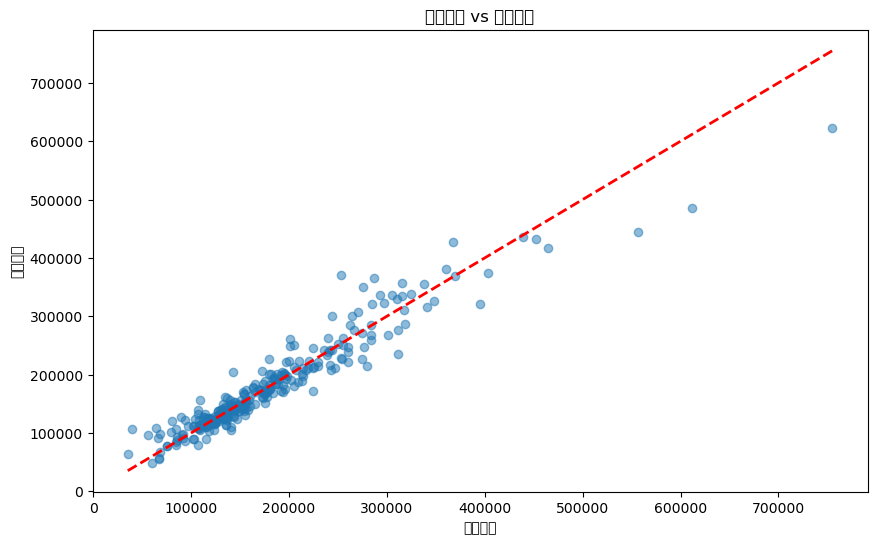

平均绝对误差 (MAE): 16179.45
中位数绝对误差 (MedAE): 9761.54


In [17]:
import matplotlib.pyplot as plt

# 绘制预测值 vs 真实值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('实际价格')
plt.ylabel('预测价格')
plt.title('实际价格 vs 预测价格')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

# 计算更多评估指标
from sklearn.metrics import mean_absolute_error, median_absolute_error

mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"平均绝对误差 (MAE): {mae:.2f}")
print(f"中位数绝对误差 (MedAE): {medae:.2f}")
